<div style="border:solid black 2px; padding: 20px">

# Reviewer's feedback v.1

**Halo Azam**
    
**Greetings from Chamdani**

Terima kasih telah mengirimkan project kamu dengan ini kamu sudah memulai sebuah langkah yang luar biasa saat ini. Disini saya akan mereview proyek kamu ya.

Saya akan memberikan beberapa komentar dan feedback seperti dibawah ini, **mohon jangan dipindah, dirubah, maupun dihapus ya :).**
    
> Mohon diperhatikan bahwa apabila ada temuan atau kesalahan yang sama namun tidak ada komentar perbaikan disana, itu berarti kamu masih tetap harus memperbaikinya yaa.

Komentar yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Ada beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan.

</div>

<div class="alert alert-info">
<b>Chamdani's info v.1</b> <a class="tocSkip"></a>

Catatan umum:
* Fungsi `print` tidak diperlukan untuk mencetak suatu nilai
* Lebih baik tulis kode pada bagian akhir cell code untuk menampilkan output tanpa `print`
* Perintah soal yang ada dalam tanda kurung siku `[...]` sebaiknya dihilangkan
* Sangat disarankan untuk menggunakan cell markdown untuk memberikan deskripsi temuan atau kesimpulan.
* Tidak disarankan menggunakan cell code untuk memberikan penjelasan / deskripsi.
* Untuk menghindari galat pada notebook project kamu. Batasi jumlah output yang dikeluarkan setiap kode dengan batas max 10 baris data.

</div>

<div style="border:solid gray 5px; padding: 20px" class="alert alert-warning">

**INGATLAH** 
* Project kamu tidak akan bisa diterima bila kamu masih memiliki feedback berwarna merah. 
* Kamu hanya memiliki 3 kali kesempatan iterasi submission disetiap projectnya 
* Jika merasa kesulitan kamu dapat menuliskan responmu atas feedback saya menggunakan blok markdown warna biru dan kamu bisa mengirimkan project pada submission selanjutnya untuk mendapatkan jawaban / respon dari saya segera yaa

Kamu dapat menjawab saya dengan menggunakan blok berwarna biru seperti ini

<div class="alert alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

Siap kak.

</div>

<div style="border:solid black 2px; padding: 20px" class="alert alert-success">
    
# General feedback v.1 *Project Accepted*

Terima kasih banyak telah mengirimkan proyek Anda! 
<br>
    
Secara keseluruhan, proyek Anda **SANGAT** mengesankan. Semoga apa yang kamu pelajari dalam project ini dapat membantu meningkatkan kemampuanmu. Pertahankan apa yang sudah bagus, dan tingkatkan apa yang menurutmu masih perlu ditingkatkan. Semoga berhasil pada project selanjutnya yaa :)

**TETAP SEMANGAT!!**
    
</div>

# Rusty Bargain: Prediksi Nilai Jual Mobil Bekas

Rusty Bargain adalah perusahaan jual beli mobil bekas yang sedang mengembangkan sebuah aplikasi untuk menarik pembeli baru. Dalam aplikasi tersebut, kamu bisa dengan cepat mengetahui nilai pasar mobilmu. Kamu memiliki akses ke data historis, spesifikasi teknis kendaraan, versi model kendaraan, dan harga kendaraan. Tugasmu adalah membuat suatu model yang mampu menentukan nilai pasar mobil.
Rusty Bargain tertarik pada:

- kualitas prediksi;
- kecepatan model dalam memprediksi;
- waktu yang diperlukan untuk melatih model

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Persiapan Data

### Mempersiapkan Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer


#Model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xg
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

import time

In [2]:
pip install category_encoders

     |████████████████████████████████| 81 kB 9.4 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import category_encoders as ce

Library category_encoders digunakan untuk proses encoding feature kategorik dengan jumlah nilai unik yang banyak dengan menggunakan metode Target Encoding.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Memuat dan Mempersiapkan Fitur

In [4]:
data = pd.read_csv("/datasets/car_data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


Terdapat data yang tidak dibutuhkan untuk pelatihan model karena tidak relevan, yaitu:
1. DateCrawled
2. RegistrationMonth
3. DateCreated
4. PostalCpde
5. LastSeen

Beberapa data tersebut sudah dapat diwakilkan oleh data lain. Seperti data **DateCrawled** dapat diwakili oleh kondisi mesin kendaraan yaitu kolom **NotRepaired**, dan **Mileage**. Data **PostalCode** membuat harga mobil menjadi terlalu spesifik, memang bisa jadi kendaraan yang kondisi yang sangat identik namun lokasinya harganya berbeda namun bukan itu yang kita inginkan. **RegristrationMonth** sudah dapat diwakilkan oleh tahun produksi **RegristrationYear**.

In [7]:
# Code untuk drop kolom
data = data.drop(['DateCrawled','RegistrationMonth','DateCreated','PostalCode','LastSeen'], axis = 1)

In [8]:
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired,NumberOfPictures
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,0
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes,0
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN,0
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,0
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,0


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

#### Fitur Numerik

Proses pemangkasan fitur sudah berjalan dengan baik. Sekarang kita akan melihat deskripsi statistik dari data numerik.

In [9]:
data.describe()

,Price,RegistrationYear,Power,Mileage,NumberOfPictures
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.0
mean,4416.656776,2004.234448,110.094337,128211.172535,0.0
std,4514.158514,90.227958,189.850405,37905.341530,0.0
min,0.000000,1000.000000,0.000000,5000.000000,0.0
25%,1050.000000,1999.000000,69.000000,125000.000000,0.0
50%,2700.000000,2003.000000,105.000000,150000.000000,0.0
75%,6400.000000,2008.000000,143.000000,150000.000000,0.0
max,20000.000000,9999.000000,20000.000000,150000.000000,0.0


**NumberOfPictures**

Kolom ini hanya memiliki satu nilai yaitu 0 untuk seluruh data. Sebaiknya dihapus saja.

In [10]:
data = data.drop(['NumberOfPictures'],axis = 1)

**RegistrationYear**

Terdapat data yang diproduksi tahun 1000 dan ada juga yang lebih dari tahun 2023. Sepertinya tidak mungkin. Mobil pertama dibuat pada tahun 1885 yang dibuat oleh Karl Benz. Apakah dia leluhur Mercedes Benz?

In [11]:
data['RegistrationYear'].value_counts()

2000    24490
1999    22728
2005    22109
2001    20124
2006    19900
        ...  
4100        1
1200        1
5300        1
8888        1
2290        1
Name: RegistrationYear, Length: 151, dtype: int64

Kita hanya akan mengambil data dari tahun 1885 hingga 2023 saja.

In [12]:
data = data.query('1885 <= RegistrationYear <= 2023')

**Power**

<AxesSubplot:>

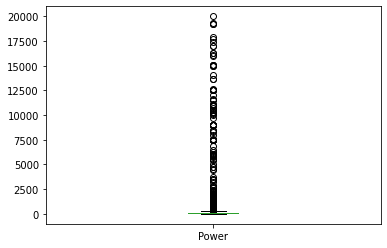

In [13]:
data['Power'].plot(kind='box')

Apabila daya bersatuan Horse Power (HP) maka nilai di atas 2000 sepertinya mustahil. Mobil dengan power terbesar saat ini yaitu Hennessey Venom F5 dengan power sebesar 1817 hp dan kendaraan pertama di dunia memiliki power sebesar 1.5 hp. Berikut beberapa jenis kendaraan lain dengan range powernya:
1. Bus: 200 - 500 hp
2. Tank: 1500-1650 hp
3. Bulldozer: ~850 hp
4. Mining Truck : ~4600 hp
5. Excavator: ~4000 hp
6. Haul Truck: ~4000 hp
7. Tractor: 600 hp

Jarang sekali mobil mobil umum/penumpang manusia yang memiliki power diatas 1800 hp. Mari kita lihat apakah dataset ini menjual mobil mining?

In [14]:
data.query('Power > 1817')['VehicleType'].unique()

array(['small', 'sedan', 'wagon', 'bus', nan, 'convertible', 'suv',
       'other', 'coupe'], dtype=object)

Tidak, mereka tidak menjual truck. Sepertinya terdapat fraud atau mungkin kesalahan satuan pada saat menginput? mereka sepertinya memasukan power dalam bentuk Watt!. Sebaiknya kita ambil data dengan power yang wajar saja yaitu kisaran 10 - 1800.

In [15]:
data = data.query('10 < Power < 1800')

<AxesSubplot:>

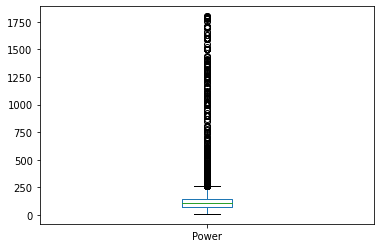

In [16]:
data['Power'].plot(kind='box')

Ya meskipun masih banyak outlier, tidak masalah. Coba kita cek untuk kendaraan dengan power diatas 1000 hp.

In [17]:
data.query('Power > 1000').sort_values(by='Power')

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
79305,1650,small,2000,auto,1001,a_klasse,150000,petrol,mercedes_benz,no
49724,1500,wagon,2003,manual,1001,focus,150000,gasoline,ford,NaN
351947,1500,bus,2001,manual,1001,zafira,5000,gasoline,opel,no
307044,1500,sedan,1999,manual,1001,astra,125000,petrol,opel,no
5328,500,wagon,1999,manual,1001,astra,150000,petrol,opel,NaN
...,...,...,...,...,...,...,...,...,...,...
273898,777,wagon,2002,manual,1783,laguna,150000,petrol,renault,no
290037,2200,coupe,2000,manual,1793,tt,150000,NaN,audi,yes
57219,3990,wagon,2003,manual,1796,c_klasse,150000,petrol,mercedes_benz,no
348006,355,sedan,1998,manual,1799,vectra,150000,petrol,opel,NaN


Mercedez benz A class bisa sampai 1000 hp? keren.

In [18]:
data.query('Brand =="mercedes_benz" & Model =="a_klasse" & VehicleType =="small"').sort_values(by='Power', ascending=False)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
322508,750,small,1999,manual,1400,a_klasse,150000,petrol,mercedes_benz,NaN
196217,850,small,1999,auto,1400,a_klasse,150000,petrol,mercedes_benz,NaN
331912,750,small,1999,manual,1400,a_klasse,150000,petrol,mercedes_benz,NaN
79305,1650,small,2000,auto,1001,a_klasse,150000,petrol,mercedes_benz,no
254066,10500,small,2009,auto,190,a_klasse,60000,petrol,mercedes_benz,yes
...,...,...,...,...,...,...,...,...,...,...
29157,800,small,2000,manual,60,a_klasse,150000,gasoline,mercedes_benz,no
241901,1000,small,2000,manual,60,a_klasse,150000,petrol,mercedes_benz,no
135349,1150,small,2000,manual,60,a_klasse,150000,gasoline,mercedes_benz,no
263345,1300,small,2004,manual,55,a_klasse,150000,gasoline,mercedes_benz,yes


Ya memang agak mencurigakan sih sejak awal. di Google saja A class palingan berkisaran 200-an hp saja. Hal ini bisa saja terjadi untuk tipe kendaraan lain. Meskipun hp sudah difilter dibawah 1800, tetapi masih ada fraud dimana power kendaraan lebih besar dari power seharusnya. Mungkin sudah di bore up haha. Untuk kasus seperti ini dibiarkan saja, sepertinya data fraud tidak terlalu banyak, untuk merci saja terdapat 4 fraud dari 732 record. Ya okelah.

**Price**

Terdapat kendaraan yang memiliki harga 0. Kenapa bisa gratis? dilihat-lihat Powernya pun bernilai 0, sepertinya barang rongsok. 

In [19]:
data.loc[data['Price']==0]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
152,0,bus,2004,manual,101,meriva,150000,lpg,opel,yes
231,0,wagon,2001,manual,115,mondeo,150000,NaN,ford,NaN
466,0,NaN,2016,auto,197,3er,150000,gasoline,bmw,no
524,0,NaN,2005,manual,136,NaN,100000,NaN,toyota,NaN
...,...,...,...,...,...,...,...,...,...,...
354175,0,NaN,1995,manual,45,polo,150000,petrol,volkswagen,NaN
354205,0,NaN,2000,manual,65,corsa,150000,NaN,opel,yes
354238,0,small,2002,manual,60,fiesta,150000,petrol,ford,NaN
354248,0,small,1999,manual,53,swift,150000,petrol,suzuki,NaN


Ternyata banyak sekali kendaraan yang harganya 0. Mari kita lihat sebarannya.

<AxesSubplot:>

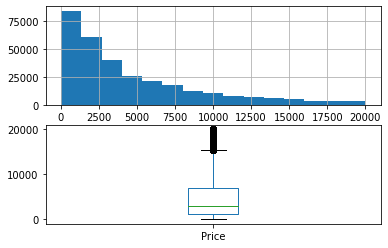

In [20]:
plt.subplot(211)
data['Price'].hist(bins=15)
plt.subplot(212)
data['Price'].plot(kind='box')

Tidak banyak outlier, saya hanya ingin filter data berdasarkan batas bawah dan atas outlier saja.

In [21]:
q25 = data.Price.quantile(.25)
q75 = data.Price.quantile(.75)
iqr = q75-q25

batas_bawah = q25 - 1.5*iqr
batas_atas = q75 + 1.5*iqr
print(batas_bawah, batas_atas)

-7210.0 15350.0


Karena batas bawah bernilai negatif maka batas bawah yang diambil adalah > 0. Saya tidak terima barang gratisan.

In [22]:
data = data.query('0<Price<=@batas_atas')

In [23]:
data.describe()

,Price,RegistrationYear,Power,Mileage
count,292770.000000,292770.00000,292770.000000,292770.000000
mean,4200.598460,2003.02862,117.886413,130249.393722
std,3718.399937,6.81206,58.725403,35177.095179
min,1.000000,1910.00000,11.000000,5000.000000
25%,1250.000000,1999.00000,75.000000,125000.000000
50%,2900.000000,2003.00000,109.000000,150000.000000
75%,6200.000000,2007.00000,143.000000,150000.000000
max,15350.000000,2019.00000,1799.000000,150000.000000


Sip, bisa jadi mobil harga satu dolar itu bekas korban banjir.

<AxesSubplot:>

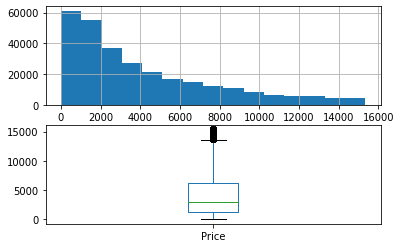

In [24]:
plt.subplot(211)
data['Price'].hist(bins=15)
plt.subplot(212)
data['Price'].plot(kind='box')

Outlier berhasil dihilangkan dari dataset namun masih menyisakan sedikit outlier baru. Tidak apa-apa.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

#### Fitur Kategorik

In [25]:
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no


Terdapat 6 feature kategorik yaitu VehicleType, Gearbox, Model, FuelType, Brand, dan NotRepaired. Kita akan melihat nilai unik dari setiap data tersebut.

In [26]:
list_kat = ['VehicleType','Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
for col in list_kat:
    print(f'Kolom :{col}')
    print(f'jumlah nilai unik: {len(data[col].unique())}')
    print()

Kolom :VehicleType
jumlah nilai unik: 9

Kolom :Gearbox
jumlah nilai unik: 3

Kolom :Model
jumlah nilai unik: 250

Kolom :FuelType
jumlah nilai unik: 8

Kolom :Brand
jumlah nilai unik: 40

Kolom :NotRepaired
jumlah nilai unik: 3



Kita lihat nilai unik untuk jumlah nilai unik yang sedikit.

In [27]:
list_kat = ['VehicleType','Gearbox', 'FuelType', 'NotRepaired']
for col in list_kat:
    print(f'Kolom :{col}')
    print(data[col].unique())
    print()

Kolom :VehicleType
['suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' nan 'coupe' 'other']

Kolom :Gearbox
['auto' 'manual' nan]

Kolom :FuelType
['gasoline' 'petrol' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']

Kolom :NotRepaired
[nan 'no' 'yes']



Tidak ada data yang bermasalah namun masih terdapat data yang bernilai nan. Nilai hilang akan diatasi pada poin selanjutnya. Selanjutnya kita akan mencari ide mengatasi kolom Model dan brand mengingat jumlah nilai uniknya yang sangat banyak. Dan kita bahwa untuk menjalankan XGBoost dan model regresi lainnya kita harus membuat fitur kategorik menjadi numerik. Ketika jumlah data uniknya banyak akan menyebabkan masalah.

Khusus untuk kolom Brand dan Model akan diterapkan Target Encoder dikarenakan jumlah nilai uniknya yang sangat banyak. Bisa saja data tersebut dihapus untuk proses pelatihan model linear regression karena menggunakan OHE. Sedangkan untuk decision tree tetap dipertahankan. Tapi karena tujuan project ini yaitu membandingkan kualitas model sehingga seharusnya datanya sama. Bisa juga kolom mobil dan brand ini dihapus untuk melatih seluruh model, tapi sepertinya akan menghilangkan informasi yang berharga.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Mengatasi Nilai Hilang

In [28]:
data.isna().sum()

Price                   0
VehicleType         21004
RegistrationYear        0
Gearbox              5991
Power                   0
Model               11905
Mileage                 0
FuelType            19450
Brand                   0
NotRepaired         46239
dtype: int64

Ternyata hanya fitur kategorik yang memiliki nilai kosong. Kalau begitu nilai nan akan diisi saja oleh data "unknown".

In [29]:
data.fillna('unknown', inplace=True)

In [30]:
data.isna().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Mileage             0
FuelType            0
Brand               0
NotRepaired         0
dtype: int64

Data hilang berhasil di atasi, selanjutnya yaitu mengubah fitur kategorik menjadi numerik.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Encoding

Karena model regresi linear tidak dapat langsung memproses fitur kategorik. maka perlu diubah terlebih dahulu menjadi feature numerik dengan OHE atau OrdalEncoder. OHE digunakan untuk model linearregression sedangkan random forest menggunakan OrdinalEncoder. random forest perlu menggunakan OrdinalEncoder karena model pohon hanya akan mengakses 1 fiture dalam satu waktu sehingga apabila digunakan OHE informasi data kategorik tidak akan diproses secara utuh karena dipecah menjadi beberapa kolom.

Kolom Brand dan Model akan menggunakan TargetEncoder, dilakukan setelah proses data splitting.

In [31]:
# data dengan OHE --> untuk linear regression dan xgboost
ohe = data.copy()
ohe = ohe.drop(['Brand','Model'], axis = 1)
ohe = pd.get_dummies(ohe, drop_first=True)
ohe.head()

,Price,RegistrationYear,Power,Mileage,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Gearbox_unknown,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,FuelType_unknown,NotRepaired_unknown,NotRepaired_yes
2,9800,2004,163,125000,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,1500,2001,75,150000,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,3600,2008,69,90000,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
5,650,1995,102,150000,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
6,2200,2004,109,150000,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
# data dengan Ordinal Encoder --> Untuk RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

list_kat = ['VehicleType','Gearbox','Model','FuelType','Brand','NotRepaired']
ordinal = data.copy()
ordinal[list_kat] = OrdinalEncoder().fit_transform(ordinal[list_kat])

ordinal.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
2,9800,6.0,2004,0.0,163,117.0,125000,2.0,14.0,1.0
3,1500,5.0,2001,1.0,75,116.0,150000,6.0,38.0,0.0
4,3600,5.0,2008,1.0,69,101.0,90000,2.0,31.0,0.0
5,650,4.0,1995,1.0,102,11.0,150000,6.0,2.0,2.0
6,2200,1.0,2004,1.0,109,8.0,150000,6.0,25.0,0.0


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Membagi Data

**Index Splitting**

Dikarenakan setiap model menggunakan sumber data yang berbeda, proses split dilakukan pada index supaya index data untuk training, validation dan test sama.

In [33]:
index_train, index_sisa = train_test_split(data.index, train_size=0.7, random_state=1)
index_valid, index_test = train_test_split(index_sisa, train_size=0.6666, random_state=1)

print(len(index_train)/(len(data)))
print(len(index_valid)/len(data))
print(len(index_test)/len(data))

0.7
0.19997950609693615
0.10002049390306383


In [34]:
# Membuat fungsi untuk mengambil index
def dataSplit(data):
    train, valid, test = data.loc[index_train], data.loc[index_valid], data.loc[index_test]
    return train, valid, test 
def featureTargetSplit(data):
    feature = data.drop(['Price'], axis = 1)
    target = data['Price']
    return feature, target

**Data Original**

In [35]:
ori_train, ori_valid, ori_test = dataSplit(data)

feature_train_ori, target_train_ori = featureTargetSplit(ori_train)
feature_valid_ori, target_valid_ori = featureTargetSplit(ori_valid)
feature_test_ori, target_test_ori = featureTargetSplit(ori_test)

**Data OHE**

In [36]:
# Melakukan Target Encoding Untuk Mendapatkan nilai numerik dari kolom brand dan model
encoder = ce.TargetEncoder()
encoder.fit(feature_train_ori[['Brand','Model']],target_train_ori)

x_train_encoded = encoder.transform(feature_train_ori[['Brand','Model']])
x_valid_encoded = encoder.transform(feature_valid_ori[['Brand','Model']])
x_test_encoded = encoder.transform(feature_test_ori[['Brand','Model']])

In [37]:
ohe_train, ohe_valid, ohe_test = dataSplit(ohe)

feature_train_ohe, target_train_ohe = featureTargetSplit(ohe_train)
feature_valid_ohe, target_valid_ohe = featureTargetSplit(ohe_valid)
feature_test_ohe, target_test_ohe = featureTargetSplit(ohe_test)

feature_train_ohe[['Brand','Model']] = x_train_encoded
feature_valid_ohe[['Brand','Model']] = x_valid_encoded
feature_test_ohe[['Brand','Model']] = x_test_encoded

**Data OrdinalEncoder**

In [38]:
oe_train, oe_valid, oe_test = dataSplit(ordinal)

feature_train_oe, target_train_oe = featureTargetSplit(oe_train)
feature_valid_oe, target_valid_oe = featureTargetSplit(oe_valid)
feature_test_oe, target_test_oe = featureTargetSplit(oe_test)

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Pelatihan Model

In [39]:
# Fungsi RMSE
def rmse(pred, real):
    return mean_squared_error(pred, real)**0.5

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Dummy Regressor

In [40]:
%%time
dr = DummyRegressor(strategy="mean")
dr.fit(feature_train_ohe, target_train_ohe)
print(f'nilai rmse: {rmse(dr.predict(feature_valid_ohe), target_valid_ohe):.4f}')

nilai rmse: 3721.3490
CPU times: user 3.65 ms, sys: 442 µs, total: 4.09 ms
Wall time: 2.5 ms


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model Linear Regression

In [41]:
%%time
lr = LinearRegression()
lr.fit(feature_train_ohe, target_train_ohe)

CPU times: user 235 ms, sys: 99.2 ms, total: 334 ms
Wall time: 327 ms


LinearRegression()

In [42]:
%%time
pred_train_lr = lr.predict(feature_train_ohe)
pred_valid_lr = lr.predict(feature_valid_ohe)
pred_test_lr = lr.predict(feature_test_ohe)

CPU times: user 35.8 ms, sys: 53.2 ms, total: 89 ms
Wall time: 103 ms


In [43]:
print("Train RMSE:", rmse(target_train_ohe, pred_train_lr))
print("Valid RMSE:", rmse(target_valid_ohe, pred_valid_lr))
print("Test RMSE: ", rmse(target_test_ohe, pred_test_lr))

Train RMSE: 2364.1201823661813
Valid RMSE: 2368.4161793263097
Test RMSE:  2351.9013475211727


Resume:
1. Training time: 348 ms
2. Prediction time: 103 ms

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model XGBoost

In [44]:
%%time

xgb = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
xgb.fit(feature_train_ohe, target_train_ohe)

[15:40:58] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 5.22 s, sys: 50.8 ms, total: 5.27 s
Wall time: 5.39 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=123, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [45]:
%%time

pred_train_xgb = xgb.predict(feature_train_ohe)
pred_valid_xgb = xgb.predict(feature_valid_ohe)
pred_test_xgb = xgb.predict(feature_test_ohe)

CPU times: user 425 ms, sys: 6.83 ms, total: 432 ms
Wall time: 403 ms


In [46]:
print("Train RMSE:", rmse(target_train_ohe, pred_train_xgb))
print("Valid RMSE:", rmse(target_valid_ohe, pred_valid_xgb))
print("Test RMSE: ", rmse(target_test_ohe, pred_test_xgb))

Train RMSE: 1588.6822051701295
Valid RMSE: 1616.031999927879
Test RMSE:  1593.5138141177044


Resume:
1. Training time: 6.11 s
2. Prediction time: 463 ms

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model Random Forest

Kita cek model RandomForest tanpa tuning hyperparameter. Apakah model ini bisa memberikan  hasil yang lebih baik dari model linear regression?.

In [47]:
%%time
rf = RandomForestRegressor()
rf.fit(feature_train_oe, target_train_oe)

pred_train = rf.predict(feature_train_oe)
pred_valid = rf.predict(feature_valid_oe)

print("Train RMSE:", rmse(target_train_oe, pred_train))
print("Valid RMSE:", rmse(target_valid_oe, pred_valid)) 

Train RMSE: 843.32318270287
Valid RMSE: 1410.935766698891
CPU times: user 1min 16s, sys: 430 ms, total: 1min 17s
Wall time: 1min 24s


Selanjutnya kita akan mencoba tuning hyperparameter dengan menggunakan for-loops. Apakah kita akan mendapatkan hyperparameter yang lebih optimal ketimbang parameter defaultnya.

In [48]:
for i in [3, 9, 15, 20]:
    for n in [50, 100, 150, 200, 250]:
        start = time.time()
        rf = RandomForestRegressor(max_depth=i, n_estimators=n)
        rf.fit(feature_train_oe, target_train_oe)

        pred_train = rf.predict(feature_train_oe)
        pred_valid = rf.predict(feature_valid_oe)
        
        end = time.time()
        
        print("Depth:", i)
        print("Estimator:", n)
        print("Train RMSE:", rmse(target_train_oe, pred_train))
        print("Valid RMSE:", rmse(target_valid_oe, pred_valid))  
        
        print("The time of execution of above program is :",
          (end-start) * 10**3, "ms")

Depth: 3
Estimator: 50
Train RMSE: 2488.7107606379313
Valid RMSE: 2502.464335996797
The time of execution of above program is : 7138.522386550903 ms
Depth: 3
Estimator: 100
Train RMSE: 2479.737434992402
Valid RMSE: 2493.669721313729
The time of execution of above program is : 13812.371253967285 ms
Depth: 3
Estimator: 150
Train RMSE: 2489.7486666015147
Valid RMSE: 2503.317846280008
The time of execution of above program is : 21499.33123588562 ms
Depth: 3
Estimator: 200
Train RMSE: 2482.091141469097
Valid RMSE: 2495.855675435871
The time of execution of above program is : 29923.79665374756 ms
Depth: 3
Estimator: 250
Train RMSE: 2480.8561535126264
Valid RMSE: 2494.662007162676
The time of execution of above program is : 35097.288370132446 ms
Depth: 9
Estimator: 50
Train RMSE: 1663.2749766508964
Valid RMSE: 1710.09151049058
The time of execution of above program is : 17792.64497756958 ms
Depth: 9
Estimator: 100
Train RMSE: 1666.3489938942548
Valid RMSE: 1711.6322412599873
The time of execu

Berdasarkan hasil tuning di atas, didapatkan model yang optimal namun tidak memakan waktu banyak yaitu ketika nilai max_depth = 20 dengan n_estimators sebanyak 50. Dengan total waktu dibutuhkan yaitu 35 detik.

In [49]:
%%time

rf = RandomForestRegressor(n_estimators = 50, max_depth = 20)
rf.fit(feature_train_oe, target_train_oe)

CPU times: user 28.7 s, sys: 60 ms, total: 28.8 s
Wall time: 29 s


RandomForestRegressor(max_depth=20, n_estimators=50)

In [50]:
%%time

pred_train = rf.predict(feature_train_oe)
pred_valid = rf.predict(feature_valid_oe)
pred_test = rf.predict(feature_test_oe)

CPU times: user 4.56 s, sys: 2 µs, total: 4.56 s
Wall time: 4.58 s


In [51]:
print("Train RMSE:", rmse(target_train_oe, pred_train))
print("Valid RMSE:", rmse(target_valid_oe, pred_valid))
print("Test RMSE: ", rmse(target_test_oe, pred_test))

Train RMSE: 908.2214289231302
Valid RMSE: 1403.0103355676374
Test RMSE:  1402.2008410388178


Resume:
1. Training time: 30.6 s
2. Prediction time: 4.76 s

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model CatBoost

In [52]:
cat_features = ['VehicleType','Gearbox','Model','FuelType','Brand','NotRepaired']

In [53]:
feature_train_ori[cat_features] = feature_train_ori[cat_features].astype('category')
feature_valid_ori[cat_features] = feature_valid_ori[cat_features].astype('category')
feature_test_ori[cat_features] = feature_test_ori[cat_features].astype('category')

In [ ]:
for i in [100, 250, 500, 750, 1000]:
    start = time.time()
    cb = CatBoostRegressor(n_estimators=i, random_state=1, verbose=False)
    cb.fit(feature_train_ori, target_train_ori, cat_features=cat_features)
    pred_train = cb.predict(feature_train_ori)
    pred_valid = cb.predict(feature_valid_ori)
    print("Estimators:", i)
    print("Train RMSE:", rmse(target_train_ori, pred_train))
    print("Valid RMSE:", rmse(target_valid_ori, pred_valid)) 
    
    end = time.time()
    print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

Estimators: 100
Train RMSE: 1427.9458687903684
Valid RMSE: 1464.6897331164582
The time of execution of above program is : 18148.396253585815 ms
Estimators: 250
Train RMSE: 1379.1274299933082
Valid RMSE: 1422.7421324186778
The time of execution of above program is : 109921.02003097534 ms
Estimators: 500
Train RMSE: 1366.0394771613512
Valid RMSE: 1413.323626787794
The time of execution of above program is : 211337.9306793213 ms


Sepertinya meningkatkan n_estimator tidak berpengaruh secara signifikan. Oleh karena itu digunakan n_estimators sebesar 100 karena jika estimators semakin banyak waktu training semakin lama namun peningkatan performanya tidak terlalu berart. Selanjutnya kita akant trial max_depth dan learning_rate.

In [ ]:
for i in [.03, .1, .25]:
    for j in [4, 7, 9]:
        start = time.time()
        cb = CatBoostRegressor(n_estimators = 100, max_depth = j, learning_rate = i, random_state=1, verbose=False)
        cb.fit(feature_train_ori, target_train_ori, cat_features=cat_features)
        pred_train = cb.predict(feature_train_ori)
        pred_valid = cb.predict(feature_valid_ori)
        print("max_depth: ", j)
        print("learning rate: ", i)
        print("Train RMSE:", rmse(target_train_ori, pred_train))
        print("Valid RMSE:", rmse(target_valid_ori, pred_valid)) 
    
        end = time.time()
        print("The time of execution of above program is :",
          (end-start) * 10**3, "ms")

learning_rate = 0.25 dan max_depth = 0.9 memberikan hasil yang paling baik.

Pada iterasi sebelumnya n_estimators paling optimal yaitu saat bernilai 500. Sekarang kita coba model dengan n_estimators = 500, learning_rate = 0.25 dan max_depth = 9.

In [ ]:
%%time
cb = CatBoostRegressor(n_estimators = 500, max_depth = 9, learning_rate = .25, random_state=1, verbose=False)
cb.fit(feature_train_ori, target_train_ori, cat_features=cat_features)


In [ ]:
%%time
pred_train = cb.predict(feature_train_ori)
pred_valid = cb.predict(feature_valid_ori)
pred_test = cb.predict(feature_test_ori)

In [ ]:
print("Train RMSE:", rmse(target_train_ori, pred_train))
print("Valid RMSE:", rmse(target_valid_ori, pred_valid)) 
print("Test RMSE:", rmse(target_test_ori, pred_test)) 

Terjadi peningkatan performa yang cukup signifikan setelah mengubah estimators menjadi 500, max_depth menjadi 9 dan learning rate 0.25.

Resume:
1. Trainign time: 5 min 47 s
2. Prediction time: 4.26 s

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model LightGBM

Kita akan mencari nilai n_estimators yang optimal dengan for-loops.

In [ ]:
for i in [500,250,100,750, 1000]:
    start = time.time()
    lg = lgb.LGBMRegressor(n_estimators=i, random_state=1)
    lg.fit(feature_train_ori, target_train_ori, categorical_feature = cat_features)
    pred_train = lg.predict(feature_train_ori)
    pred_valid = lg.predict(feature_valid_ori)
    print("Estimators:", i)
    end = time.time()
    print("Train RMSE:", rmse(target_train_ori, pred_train))
    print("Valid RMSE:", rmse(target_valid_ori, pred_valid)) 
    
    print("The time of execution of above program is :",
          (end-start) * 10**3, "ms")

n_estimators optimal yaitu 500. selanjutnya kita akan trial max_depth dan learning rate.

In [ ]:
for i in [.03, .15, .3]:
    for j in [5, 10, 15]:
        start = time.time()
        lg = lgb.LGBMRegressor(n_estimators=500, max_depth = j, learning_rate = i,random_state=1)
        lg.fit(feature_train_ori, target_train_ori, categorical_feature = cat_features)
        pred_train = lg.predict(feature_train_ori)
        pred_valid = lg.predict(feature_valid_ori)
        print("Depth:", j)
        print("Learning rate:", i)
        end = time.time()
        print("Train RMSE:", rmse(target_train_ori, pred_train))
        print("Valid RMSE:", rmse(target_valid_ori, pred_valid)) 
    
        print("The time of execution of above program is :",
              (end-start) * 10**3, "ms")

Ternyata nilai max_depth dan learning rate default masih lebih baik ketimbang ketika di tuning. Model yang akan digunakan yaitu model dengan estimators 500 sisanya dibiarkan default.

In [ ]:
%%time

lg = lgb.LGBMRegressor(n_estimators=500, random_state=1)
lg.fit(feature_train_ori, target_train_ori, categorical_feature = cat_features)

In [ ]:
%%time

pred_train = lg.predict(feature_train_ori)
pred_valid = lg.predict(feature_valid_ori)
pred_test = lg.predict(feature_test_ori)

In [ ]:
print("Train RMSE:", rmse(target_train_ori, pred_train))
print("Valid RMSE:", rmse(target_valid_ori, pred_valid))
print("Test RMSE: ", rmse(target_test_ori, pred_test))

Resume:
1. Training time: 10.6 s
2. Prediction time: 14.6 s

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Analisis Model

Berikut adalah tabel hasil pengujian terhadap 5 model berbeda.

|Model Name|Training Time|Prediction Time|Train RMSE|Valid RMSE|Test RMSE|Data|
|-|-|-|-|-|-|-|
|Linear Regression|348 ms|103 ms|2364|2368|2351|OHE|
|XGBoost|6.11 s|463 ms|1588|1616|1593|OHE|
|Random Forest|30.6 s|4.76 s|907|1403|1402|OrdinalEncoder|
|CatBoost|5 min 47 s|4.26 s|1230|1368|1360|Original|
|LightGBM|10.6 s|14.6 s|1259|1365|1358|Original|

Berdasarkan hasil pengujian, berikut simpulan yang diperoleh:
1. Model dengan performa terbaik yaitu LightGBM karena mampu mendapatkan RMSE paling tinggi dengan durasi training dan predict yang cepat.
2. Model Linear Regression merupakan model dengan durasi palatihan dan predict paling cepat (<1 s) namun akurasinya tidak terlalu baik yang ditandai dengan RMSE yang tinggi.
3. Model XGBoost merupakan model dengan durasi training yang cepat dengan peningkatan akurasi yang signifikan dibandingkan dengan Linear Regression.
4. CatBoost dan LightGBM mampu mengolah data kategorik tanpa perlu proses encoding. Serta menghasilkan RMSE yang baik. Oleh karena itu model ini cocok untuk data dengan feature kategorik yang banyak dan kompleks.
5. Model Linear Regression, XGBoost, dan Random Forest memerlukan proses encoding untuk dapat mengolah data kategorik. Kualitas model ini bisa jadi lebih baik apabila memproses data dengan fitur kategorik yang sederhana.
6. XGBoost dapat menjadi solusi apabila kita membutuhkan model dengan tingkat efisiensi yang tinggi dengan durasi pelatihan dan training yang cepat namun tetap dapat menjaga akurasi. Meskipun Random Forest memiliki akurasi yang lebih tinggi namun membutuhkan waktu hingga 5x lebih lama.
7. Seluruh model lebih baik dari model Dummy.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

# Daftar Periksa

Ketik 'x' untuk menandakannya sebagai selesai. Lalu, tekan tombol Shift+Enter

- [x]  Jupyter Notebook bisa dibuka
- [x]  Tidak ada kesalahan pada kode
- [x]  Sel-sel dengan kode telah disusun berdasarkan urutan eksekusi
- [x]  Data telah diunduh dan disiapkan- [ ]  Model sudah dilatih
- [x]  Analisis terhadap kecepatan dan kualitas model telah dilakukan